In [123]:
import os
import json
import re
import numpy as np

from utils.get_url import get_data

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

- Tinha usado este código antes, mas percebi que era redundante pois meu erro estava em não seleceionar o que eu queria pegar, que era o {index} 'data'.

```
df_normalize = pd.json_normalize(get_data(label)['data'])
df_vagas = pd.DataFrame.from_dict(df_normalize)
```

In [147]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

label_dados = 'dados'
label_designer = 'designer'
label_ux = 'ux'


# Transformando dados em Dataframe
df_vagas_dados = pd.DataFrame((get_data(label_dados))['data']) 
df_vagas_designer = pd.DataFrame((get_data(label_designer))['data']) 
df_vagas_ux = pd.DataFrame((get_data(label_ux))['data']) 

Procurando por vagas 'dados'...
Procurando por vagas 'designer'...
Procurando por vagas 'ux'...


In [141]:
# Unindo os Dataframes
df_vagas_list = [df_vagas_dados, df_vagas_designer, df_vagas_ux]
df_vagas = pd.concat(df_vagas_list)
df_vagas = (df_vagas
 .reset_index()
 .replace(r'^\s*$', 'Dado Não Disponível', regex=True)
 )

In [126]:
def check_category(x = str):
    if 'dados' in x.lower():
        return 'Dados'
    elif 'designer' in x.lower():
        return 'Designer'
    else:
        return 'UX/UI'

In [142]:
df_vagas['tipo_de_vaga'] = df_vagas['name'].apply(check_category)

In [175]:
df_vagas

,index,id,companyId,name,description,careerPageId,careerPageName,careerPageLogo,type,publishedDate,applicationDeadline,isRemoteWork,city,state,country,jobUrl,badges,disabilities,workplaceType,careerPageUrl,tipo_de_vaga
0,0,8269099,34984,Analista de Dados Pleno - Modelo de trabalho r...,Nós somos o Melhor Envio 💙&nbsp;Certificada du...,100099,Melhor Envio,https://attachments.gupy.io/production/compani...,vacancy_type_effective,2024-12-09T20:47:52.380Z,2025-02-07T00:00:00.000Z,True,Dado Não Disponível,Dado Não Disponível,Brasil,https://melhorenvio.gupy.io/job/eyJqb2JJZCI6OD...,{'friendlyBadge': True},True,remote,https://melhorenvio.gupy.io/eyJzb3VyY2UiOiJndX...,Dados
1,1,8269220,5581,Estágio em Tecnologia 50+ (Dados Estratégicos)...,Nosso cliente é uma empresa do segmento financ...,166396,QiBit Vagas,https://attachments.gupy.io/production/compani...,vacancy_type_internship,2024-12-09T20:47:38.311Z,2025-02-07T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,https://qibit.gupy.io/job/eyJqb2JJZCI6ODI2OTIy...,{'friendlyBadge': False},True,hybrid,https://qibit.gupy.io/eyJzb3VyY2UiOiJndXB5X3Bv...,Dados
2,2,8269173,487,Engenheiro(a) de Dados Pl,Você sonha grande e acredita que é importante ...,32086,Dasa Tecnologia,https://attachments.gupy.io/production/compani...,vacancy_type_effective,2024-12-09T20:40:27.138Z,2025-01-10T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,https://dasatecnologia.gupy.io/job/eyJqb2JJZCI...,{'friendlyBadge': True},True,hybrid,https://dasatecnologia.gupy.io/eyJzb3VyY2UiOiJ...,Dados
3,3,8268996,68518,Estagio área Jurídica Proteção de Dados,Estamos em busca de um estudante de direito qu...,165258,Contego Security,https://attachments.gupy.io/production/compani...,vacancy_type_internship,2024-12-09T20:30:41.515Z,2025-03-31T00:00:00.000Z,False,Joinville,Santa Catarina,Brasil,https://contego.gupy.io/job/eyJqb2JJZCI6ODI2OD...,{'friendlyBadge': True},False,on-site,https://contego.gupy.io/eyJzb3VyY2UiOiJndXB5X3...,Dados
4,4,8268470,487,Cientista de Dados,Você sonha grande e acredita que é importante ...,32086,Dasa Tecnologia,https://attachments.gupy.io/production/compani...,vacancy_type_effective,2024-12-09T19:50:13.046Z,2025-01-09T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,https://dasatecnologia.gupy.io/job/eyJqb2JJZCI...,{'friendlyBadge': True},True,hybrid,https://dasatecnologia.gupy.io/eyJzb3VyY2UiOiJ...,Dados
5,5,8230579,32806,Engenheiro de Dados Pleno,"A Wisebyte é uma empresa de tecnologia, integr...",165313,Wisebyte,https://attachments.gupy.io/production/compani...,vacancy_type_effective,2024-12-09T19:12:44.734Z,2025-01-17T00:00:00.000Z,False,Uberlândia,Minas Gerais,Brasil,https://wisebyte.gupy.io/job/eyJqb2JJZCI6ODIzM...,{'friendlyBadge': False},True,hybrid,https://wisebyte.gupy.io/eyJzb3VyY2UiOiJndXB5X...,Dados
6,6,8268003,859,Analista de Projeto de Dados II,Estamos em busca de profissionais com experiên...,1167,GOL Linhas Aéreas,https://attachments.gupy.io/production/compani...,vacancy_type_effective,2024-12-09T19:08:51.106Z,2024-12-17T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,https://golcarreiras.gupy.io/job/eyJqb2JJZCI6O...,{'friendlyBadge': True},True,hybrid,https://golcarreiras.gupy.io/eyJzb3VyY2UiOiJnd...,Dados
7,7,8267144,715,Cientista de dados,Pensou em farmácia? Farmácias App.O seu APP de...,1413,Farmácias APP,https://attachments.gupy.io/production/compani...,vacancy_type_effective,2024-12-09T17:47:29.731Z,2025-02-07T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,https://farmaciasapp.gupy.io/job/eyJqb2JJZCI6O...,{'friendlyBadge': True},True,hybrid,https://farmaciasapp.gupy.io/eyJzb3VyY2UiOiJnd...,Dados
8,8,8267001,715,Analista de Dados SR,Pensou em farmácia? Farmácias App.O seu APP de...,1413,Farmácias APP,https://attachments.gupy.io/production/compani...,vacancy_type_effective,2024-12-09T17:42:25.498Z,2025-02-07T00:00:00.000Z,False,São Paulo,São Paulo,Brasil,https://farmaciasapp.gupy.io/job/eyJqb2JJZCI6O...,{'friendlyBadge': True},True,hybrid,https://farmaciasapp.gupy.io/eyJzb3VyY2UiOiJnd...,D

In [ ]:
total_de_vagas = (df_vagas
                  .groupby('tipo_de_vaga')
                  .agg(
                      quantidade = ('tipo_de_vaga', 'value_counts'),
                      estado = ('state', 'unique')
                  ).reset_index()
                  )

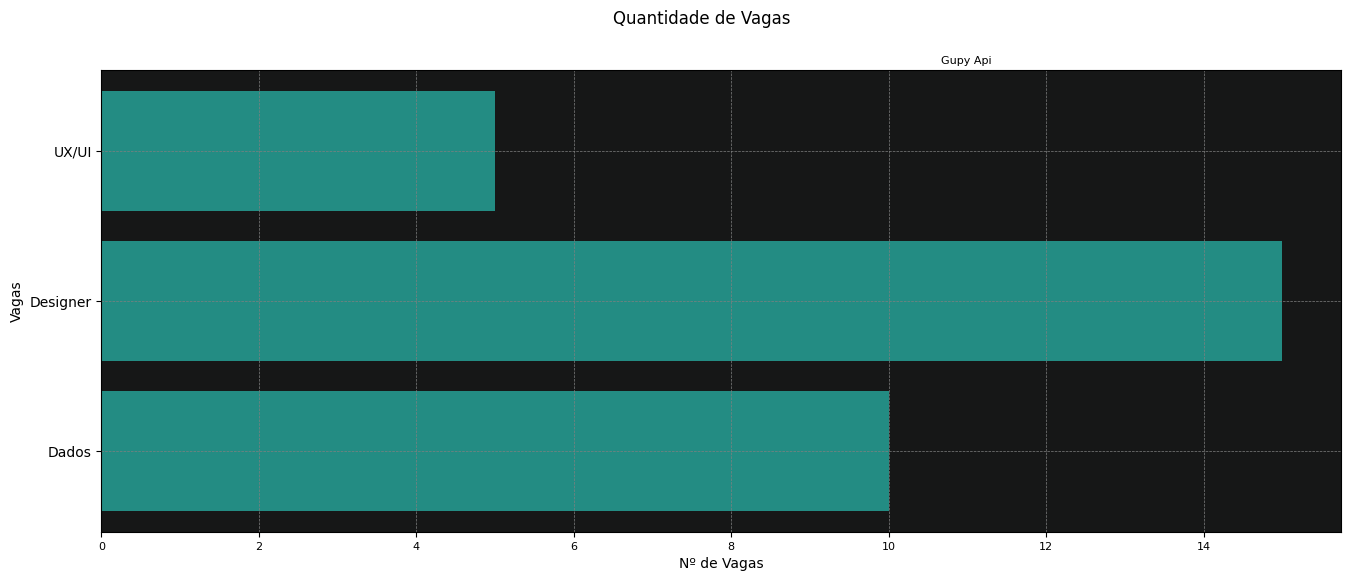

In [209]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(total_de_vagas['tipo_de_vaga'], total_de_vagas['quantidade'], color='#238c83')
ax.set_facecolor('#161717')

fig.suptitle('Quantidade de Vagas')

plt.grid(color='grey', linestyle='--', linewidth = 0.5)
plt.figtext(0.65, 0.89, 'Gupy Api', fontsize=8)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.xlabel('Nº de Vagas')

plt.ylabel('Vagas')


plt.show()

In [214]:
df_vagas_por_estado = (df_vagas.groupby('state')
                    .agg(
                        vagas_por_estado = ('tipo_de_vaga', 'value_counts'),
                    )
                    .reset_index()
                    .sort_values('state', ascending=False)
                )
df_vagas_por_estado

,state,tipo_de_vaga,vagas_por_estado
11,São Paulo,Dados,7
12,São Paulo,Designer,7
13,São Paulo,UX/UI,1
10,Santa Catarina,Dados,1
9,Rio de Janeiro,UX/UI,1
8,Rio Grande do Sul,Designer,2
7,Pernambuco,UX/UI,1
5,Minas Gerais,Dados,1
6,Minas Gerais,Designer,1
4,Espírito Santo,UX/UI,1


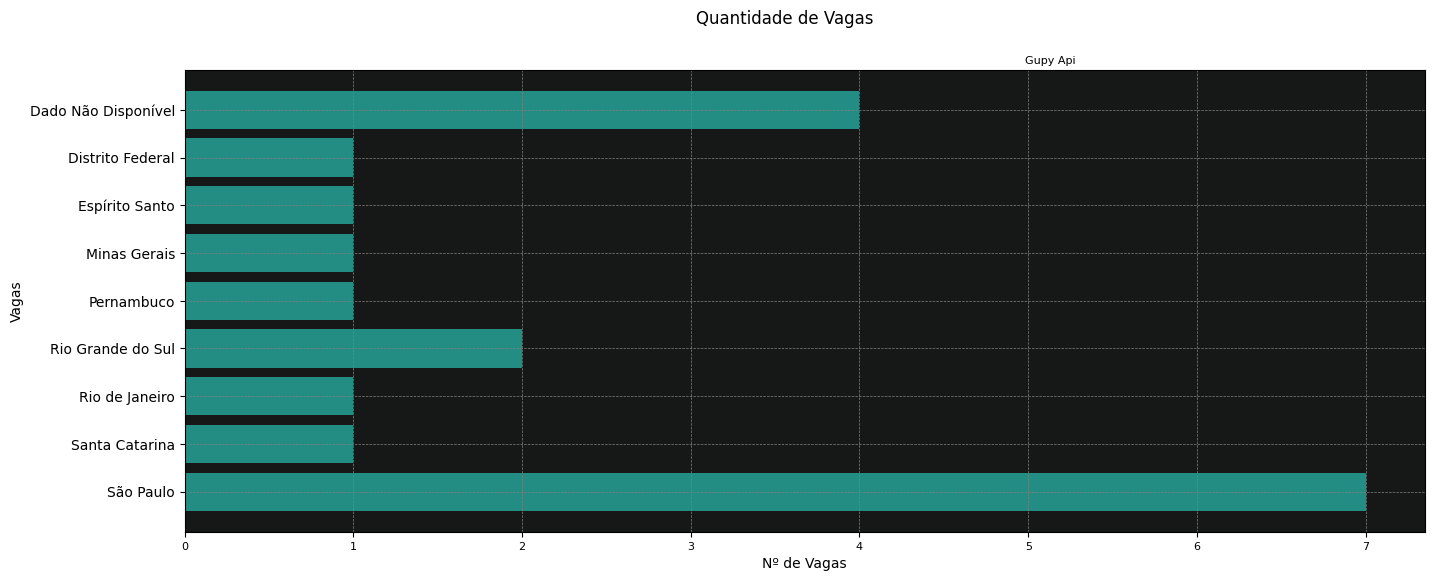

In [215]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_vagas_por_estado['state'], df_vagas_por_estado['vagas_por_estado'], color='#238c83')
ax.set_facecolor('#161717')

fig.suptitle('Quantidade de Vagas')

plt.grid(color='grey', linestyle='--', linewidth = 0.5)
plt.figtext(0.65, 0.89, 'Gupy Api', fontsize=8)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

plt.xlabel('Nº de Vagas')

plt.ylabel('Vagas')


plt.show()

In [ ]:
states = df_vagas_por_estado['state']
tipo_de_vaga_series = df_vagas_por_estado.items()

<generator object DataFrame.items at 0x0000015DA530E200>

ValueError: number of labels (2) does not match number of bars (14).

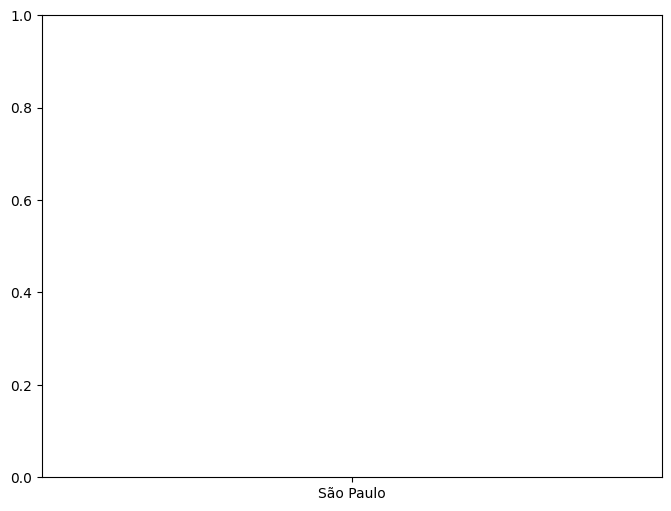

In [263]:

states = df_vagas_por_estado['state']
tipo_de_vaga_columns = df_vagas_por_estado.items()

bottom = np.zeros(len(states))
fig, ax = plt.subplots(figsize = (8,6))

for tipo_de_vaga in tipo_de_vaga_columns:
    vagas_count = df_vagas_por_estado['vagas_por_estado']

    v = ax.bar(
            states,
            vagas_count, 
            width= 0.6, 
            label= tipo_de_vaga,                
            bottom = bottom)
    bottom += vagas_count

    ax.bar_label(v, label_type='center', fontsize = 8)

ax.set_title('Tipo de Vagas por estado')
ax.legend(
        title = 'Tipo de Vaga',
          loc="upper right"
          )

plt.show()

